# Day 8 作業

## [作業目標]
* 熟悉濾波器的操作

    1. 比較四種低通濾波器的去噪能力及運算時間 (Average, Gaussian, NL, Median)
    2. 比較兩種邊緣偵測演算法的效果及運算時間 (Sobel, Canny)

## [作業重點]
* 熟悉 OpenCV 的 filter2D 函數
* 觀察圖片的變化

' Your Code Here: 讀取 lena_noise.png 並使用 matplotlib 顯示 '

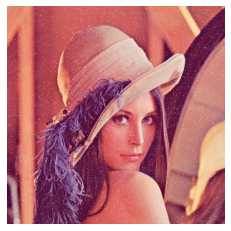

In [2]:
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
img = cv2.imread('lena_noise.png')
plt.imshow(img[:, :, [2, 1, 0]])
plt.axis('off')
""" Your Code Here: 讀取 lena_noise.png 並使用 matplotlib 顯示 """

# 1. 比較四種低通濾波器的去噪能力及運算時間 (Average, Gaussian, NL, Median)
* 因為 Average, Gaussian 都是使用 filter2D 去掃描圖片，故速度差不多
* NL 具較高的時間複雜度，需要較久的時間
* Median 具有最好的去白噪點效果，因為該演算法只會取範圍內的中位數，可以徹底去除極端值

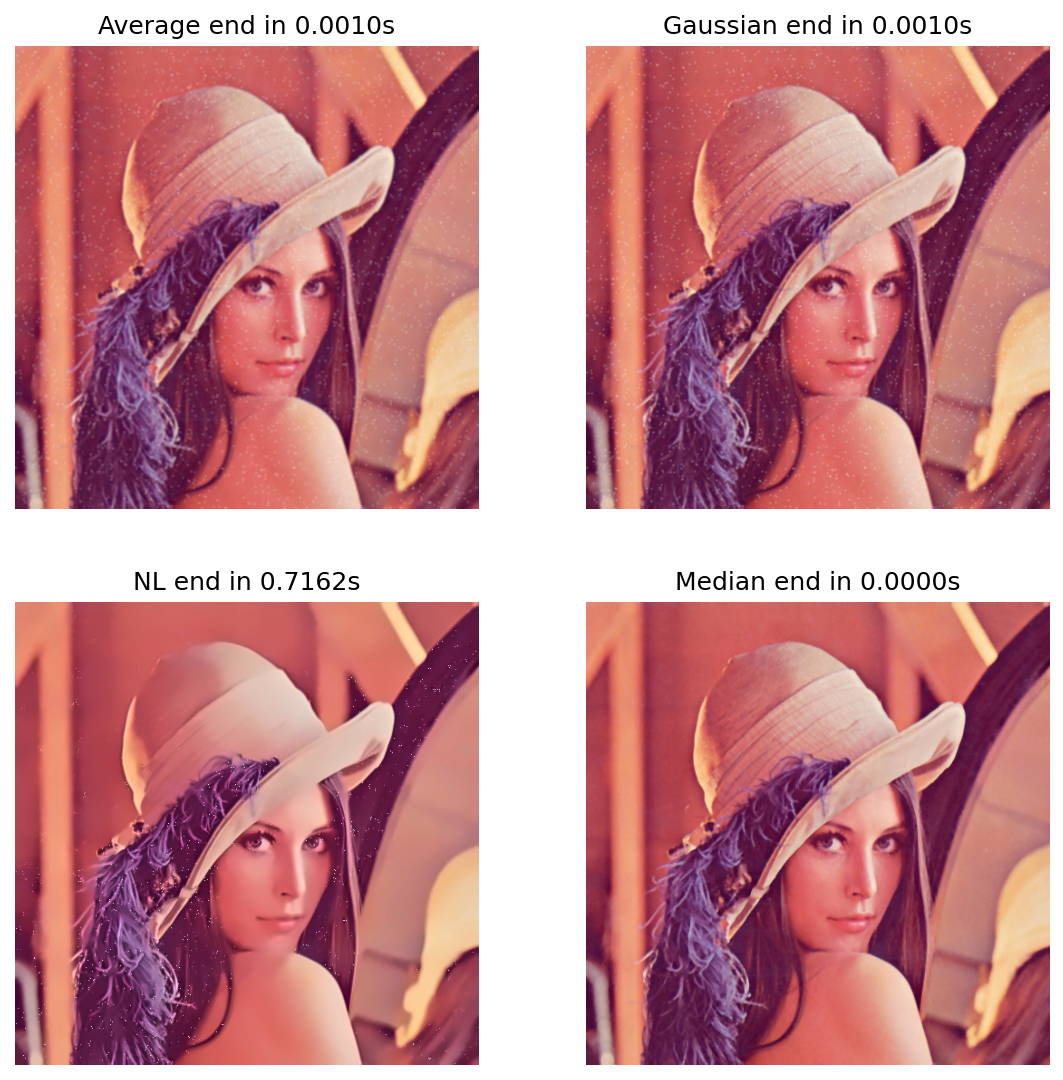

In [11]:
""" Your Code Here: 分別比較四個演算法的運算時間及畫出處理後的圖片 """
average_filter = np.ones((3, 3)) / 9
gaussian_filter = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]) / 16  
time_save=[]
start=time.time()
img_average = cv2.filter2D(img, -1, average_filter)
end=time.time()
time_save.append(end-start)
start=time.time()
img_gaussian = cv2.filter2D(img, -1, gaussian_filter)
end=time.time()
time_save.append(end-start)
start=time.time()
img_NL = cv2.fastNlMeansDenoisingColored(img,None,10,10,7,21)
end=time.time()
time_save.append(end-start)
start=time.time()
img_median=cv2.medianBlur(img,3)
end=time.time()
time_save.append(end-start)
#print(time_save)
plt.figure(figsize = (9, 9), dpi = 150)
show_img = [img_average, img_gaussian, img_NL, img_median]
show_name = ['Average', 'Gaussian', 'NL', 'Median']
for i in range(len(show_img)):
    plt.subplot(2, 2, i + 1)
    plt.imshow(show_img[i][:, :, [2, 1, 0]])
    plt.axis('off')
    plt.title('{} end in {:.4f}s'.format(show_name[i],time_save[i]))

# 2. 比較兩種邊緣偵測演算法的效果及運算時間 (Sobel, Canny)

In [19]:
sobel_x = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
    ])
sobel_y = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
    ])
def sobel(gray):
    sobel_x = np.array([
    [1, 2, 1],
    [0, 0, 0],
    [-1, -2, -1]
    ])
    sobel_y = np.array([
    [1, 0, -1],
    [2, 0, -2],
    [1, 0, -1]
    ])
    Gx = cv2.filter2D(gray, -1, sobel_x)
    Gx = cv2.convertScaleAbs(Gx)
    Gy = cv2.filter2D(gray, -1, sobel_y)
    Gy = cv2.convertScaleAbs(Gy)
    edge = cv2.addWeighted(Gx, 0.5, Gy, 0.5, 0)
    return edge

def canny(gray):
    gaussian_filter = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
    ]) / 16
    gray_gaussian = cv2.filter2D(gray, -1, gaussian_filter)
    edge=cv2.Canny(gray_gaussian, 50, 150)
    return edge

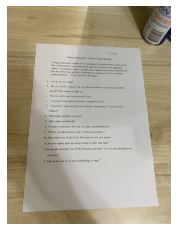

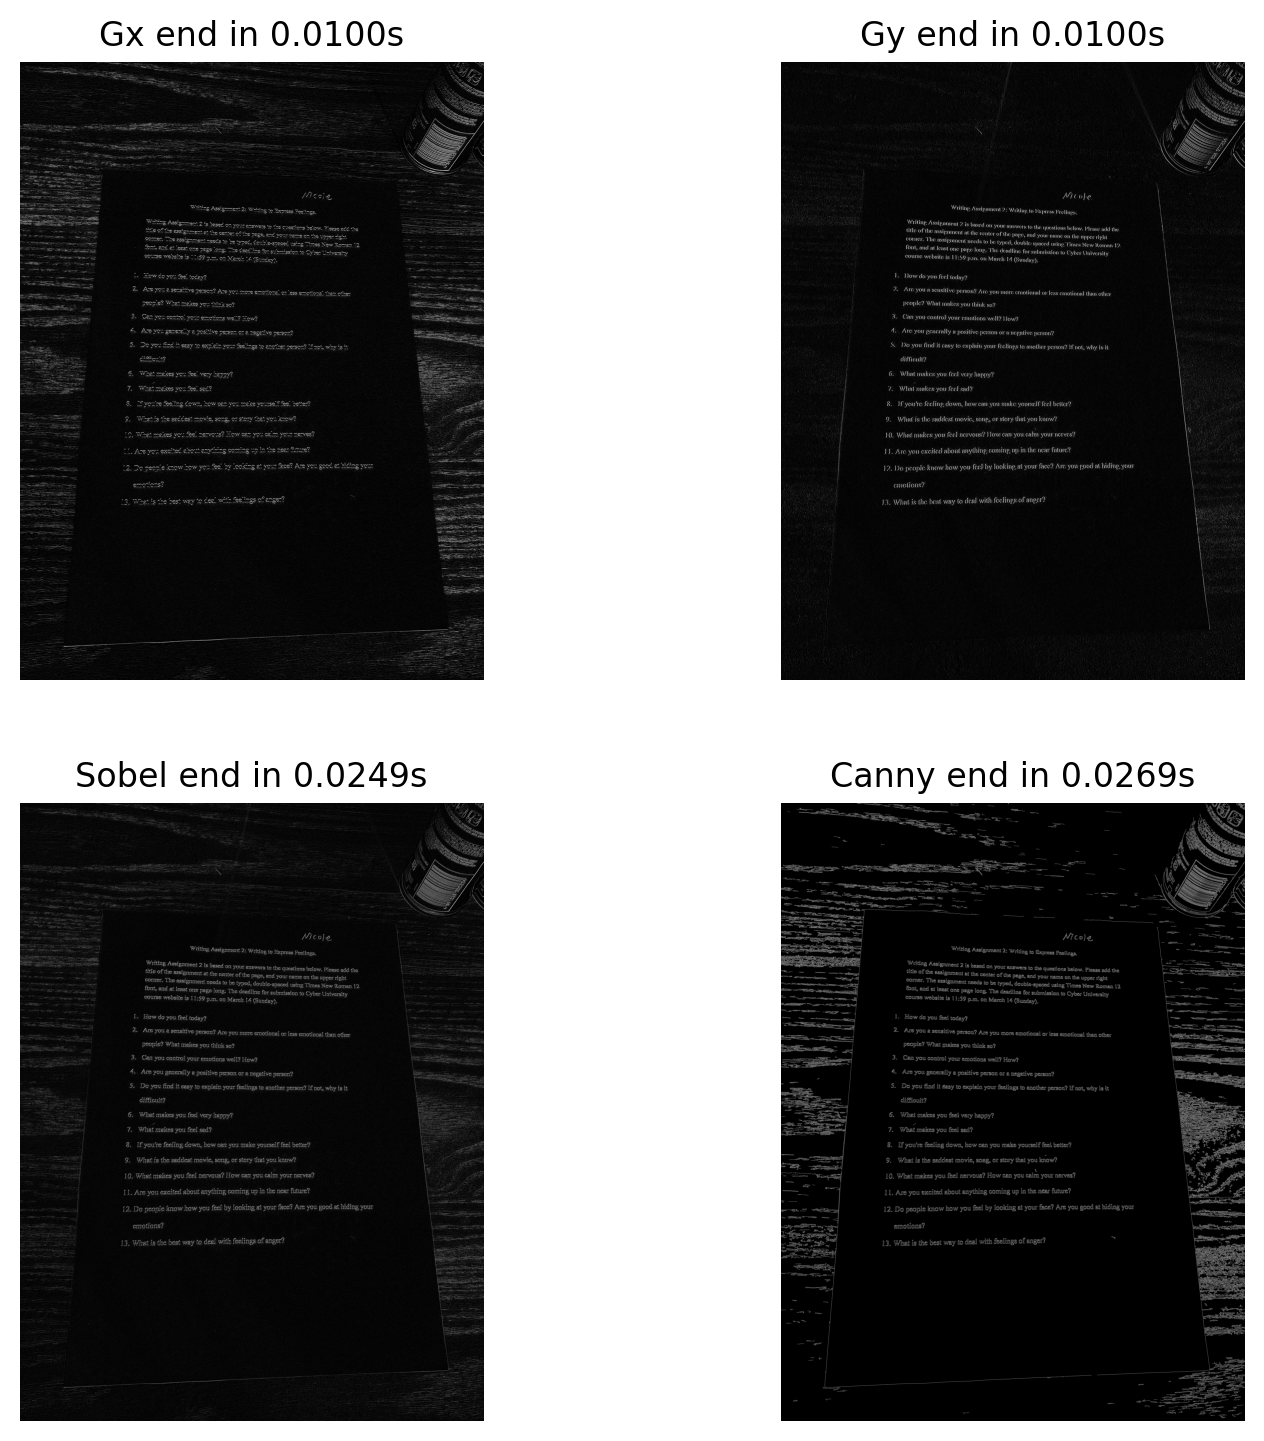

In [21]:
""" Your Code Here: 讀取 ./data/paper.jpg 進行實作 """
import cv2
import numpy as np
import time
import matplotlib.pyplot as plt
paper = cv2.imread('paper.jpg')
img = cv2.imread('lena_noise.png')
plt.imshow(paper[:, :, [2, 1, 0]])
plt.axis('off')
gray = cv2.cvtColor(paper, cv2.COLOR_BGR2GRAY)
time_save=[]
start=time.time()
Gx = cv2.filter2D(gray, -1, sobel_x)
Gx = cv2.convertScaleAbs(Gx)
end=time.time()
time_save.append(end-start)
start=time.time()
Gy = cv2.filter2D(gray, -1, sobel_y)
Gy = cv2.convertScaleAbs(Gy)
end=time.time()
time_save.append(end-start)
start=time.time()
paper_sobel=sobel(gray)
end=time.time()
time_save.append(end-start)
start=time.time()
paper_canny=canny(gray)
end=time.time()
time_save.append(end-start)
""" Your Code Here: 分別比較四個演算法的運算時間及畫出處理後的圖片 """
plt.figure(figsize = (9, 9), dpi = 200)
show_img = [Gx, Gy, paper_sobel, paper_canny]
show_name = ['Gx', 'Gy', 'Sobel', 'Canny']
for i in range(len(show_img)):
    plt.subplot(2, 2, i + 1)
    plt.imshow(show_img[i], cmap = 'gray')
    plt.axis('off')
    plt.title('{} end in {:.4f}s'.format(show_name[i],time_save[i]))